 # <center>Sentiment Analysis_Lab3


### Name : COULIBALY Adama

### Objectif : Train your own mini sentiment classifier on the US Airline Tweets dataset.

#### You are free to use any approach or a combination of approaches (pre-trained models, traditional machine learning, deep learning).

### 🌟 Once you're done, don't forget to add it to your CV:
#### Project: Sentiment Analysis on US Airline Tweets
#### Tools: Python, pandas, scikit-learn, Hugging Face transformers....

### Bonus Tip

** Save you final model (.pkl or Hugging Face format) and deploy it.

** You can also publish a small portfolio project on you GitHub.

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [ ]:
plt.rcParams["figure.figsize"] = (18, 10)
plt.style.use("fivethirtyeight")

In [7]:
# Import Data
df = pd.read_excel("US_Airline_Tweets.xlsx")
df.head()

,Tweets,Manually_Annotated
0,@VirginAmerica What @dhepburn said.,Neutral
1,@VirginAmerica plus you've added commercials t...,Positive
2,@VirginAmerica I didn't today... Must mean I n...,Neutral
3,@VirginAmerica it's really aggressive to blast...,Negative
4,@VirginAmerica and it's a really big bad thing...,Negative


In [8]:
df.shape

(1000, 2)

In [9]:
text1 = df.loc[0, "Tweets"]
text2 = df.loc[1, "Tweets"]
text3 = df.loc[3, "Tweets"]

## Using RoBERTa

In [10]:
#! pip install transformers --quiet

In [11]:
from transformers import pipeline

c:\Users\ADAMA\Desktop\Sentiment analysis\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
#import torch
#from transformers import BertModel, BertConfig

# Initializing a BERT bert-base-uncased style configuration
#configuration = BertConfig()

# Initializing a model from the bert-base-uncased style configuration
#model = BertModel(configuration)

# Accessing the model configuration
#configuration = model.config

In [13]:
#!pip install transformers --quiet

from transformers import pipeline

# Pipeline d’analyse de sentiments
classifier = pipeline("sentiment-analysis")

# Exemple
texts = [
    text1,
    text2,
    text3
]

results = classifier(texts)
for text, result in zip(texts, results):
    print(f"Texte : {text} Résultat : {result}\n")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


Texte : @VirginAmerica What @dhepburn said. Résultat : {'label': 'POSITIVE', 'score': 0.8633629679679871}

Texte : @VirginAmerica plus you've added commercials to the experience... tacky. Résultat : {'label': 'POSITIVE', 'score': 0.6070859432220459}

Texte : @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse Résultat : {'label': 'NEGATIVE', 'score': 0.9973449110984802}



In [70]:
#! pip install tensorflow --quiet

# Initialisation du pipeline pour l'analyse de sentiment avec RoBERTa
analyse_sentiment = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment")

# Exemple
texts = [
    text1,
    text2,
    text3
]

label_map = {
    'LABEL_0': 'Negative',
    'LABEL_1': 'Neutral',
    'LABEL_2': 'Positive'
}

results = analyse_sentiment(texts)
for text, result in zip(texts, results):
    label = label_map[result['label']]
    score = result['score']
    result = f"{label} ({score:.2f})"
    print(f"Texte : {text} Résultat : {result}\n")

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


Device set to use cpu


Texte : @VirginAmerica What @dhepburn said. Résultat : Neutral (0.80)

Texte : @VirginAmerica plus you've added commercials to the experience... tacky. Résultat : Negative (0.83)

Texte : @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse Résultat : Negative (0.90)



In [15]:
X = df["Tweets"]
y = df["Manually_Annotated"]

### Evaluate BERT Model

In [30]:
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay  
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [24]:
results_bert = classifier(X.tolist())
y_pred_bert = [i["label"] for i in results_bert]
#print(y_pred_bert[:5])
#print(y[:5])
#print(y_pred_bert[:5] == y[:5])

Text(0.5, 1.0, 'Metrics for Pretrained Model BERT')

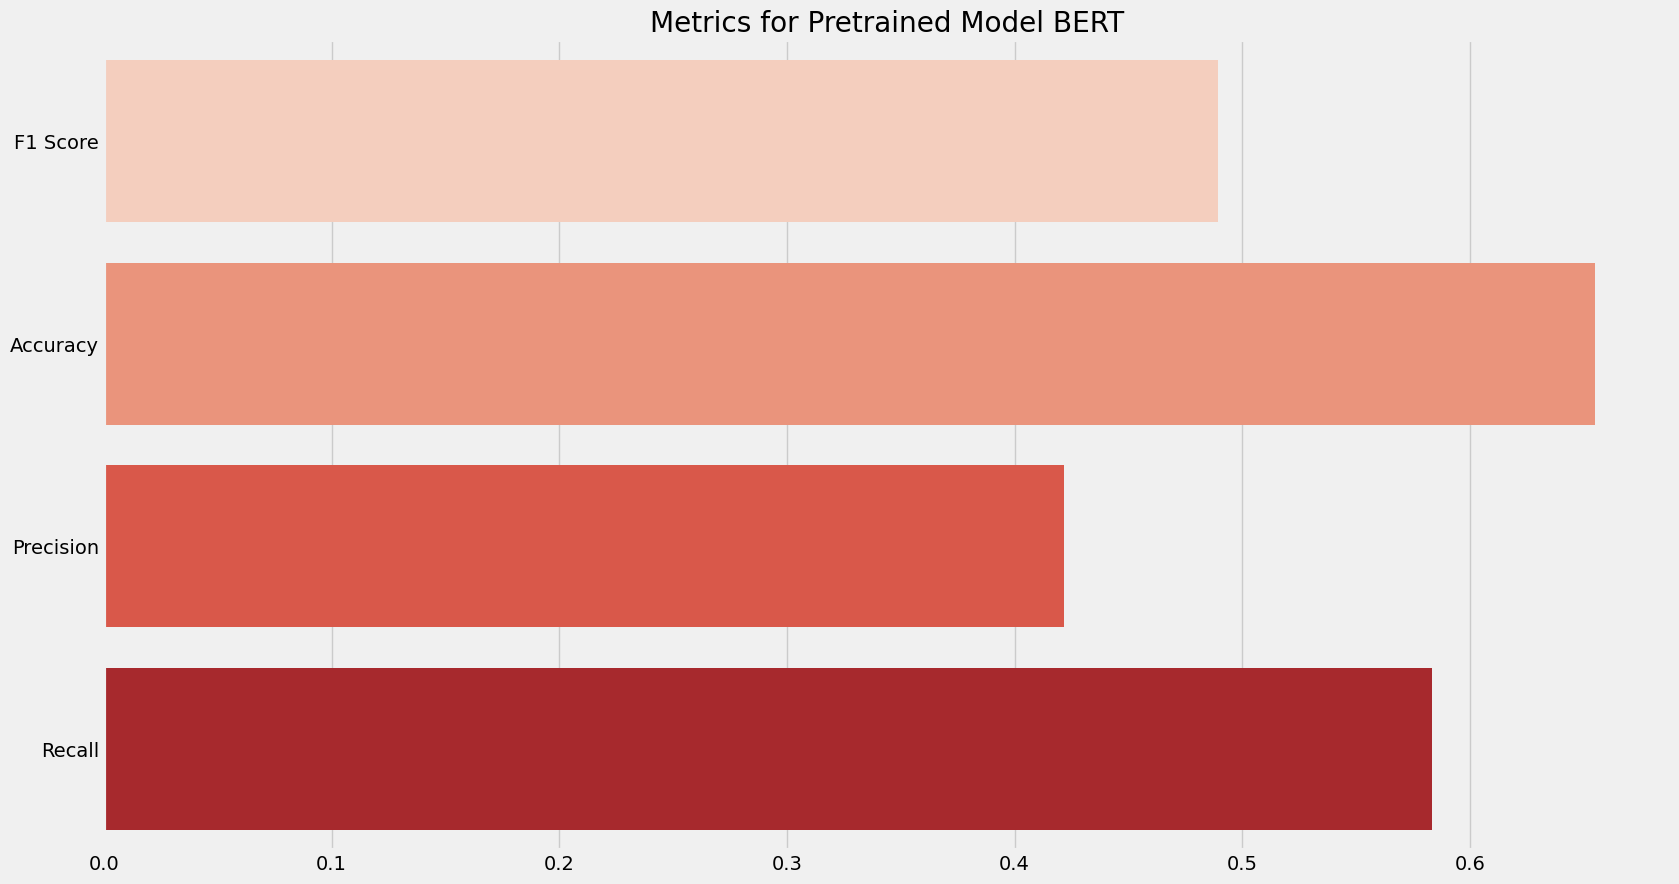

In [50]:
f1_burt = f1_score(y.str.upper().tolist(), y_pred_bert, average="macro")
#print(f"F1 Score:           {f1_burt:.4f}")
acc_burt = accuracy_score(y.str.upper().tolist(), y_pred_bert)
#print(f"Accuracy:           {acc_burt:.4f}")
precision_score_burt = precision_score(y.str.upper().tolist(), y_pred_bert, average="macro")
#print(f"Precision:          {precision_score_burt:.4f}")
recall_score_burt = recall_score(y.str.upper().tolist(), y_pred_bert, average="macro")
#print(f"Recall:             {recall_score_burt:.4f}")
dict_burt = {
    "F1 Score": f1_burt,
    "Accuracy": acc_burt,
    "Precision": precision_score_burt,
    "Recall": recall_score_burt
}

sns.barplot(y=list(dict_burt.keys()), x=list(dict_burt.values()), hue=list(dict_burt.keys()), palette="Reds")
plt.title("Metrics for Pretrained Model BERT")

### Evaluate RoBERTa

In [72]:
results_roberta = analyse_sentiment(X.tolist())
y_pred_roberta = [label_map[i["label"]] for i in results_roberta]
print(y_pred_roberta[:5])
print(y[:5])
print(y_pred_roberta[:5] == y[:5])

['Neutral', 'Negative', 'Neutral', 'Negative', 'Negative']
0     Neutral
1    Positive
2     Neutral
3    Negative
4    Negative
Name: Manually_Annotated, dtype: object
0     True
1    False
2     True
3     True
4     True
Name: Manually_Annotated, dtype: bool


Text(0.5, 1.0, 'Metrics for Pretrained Model RoBERTa')

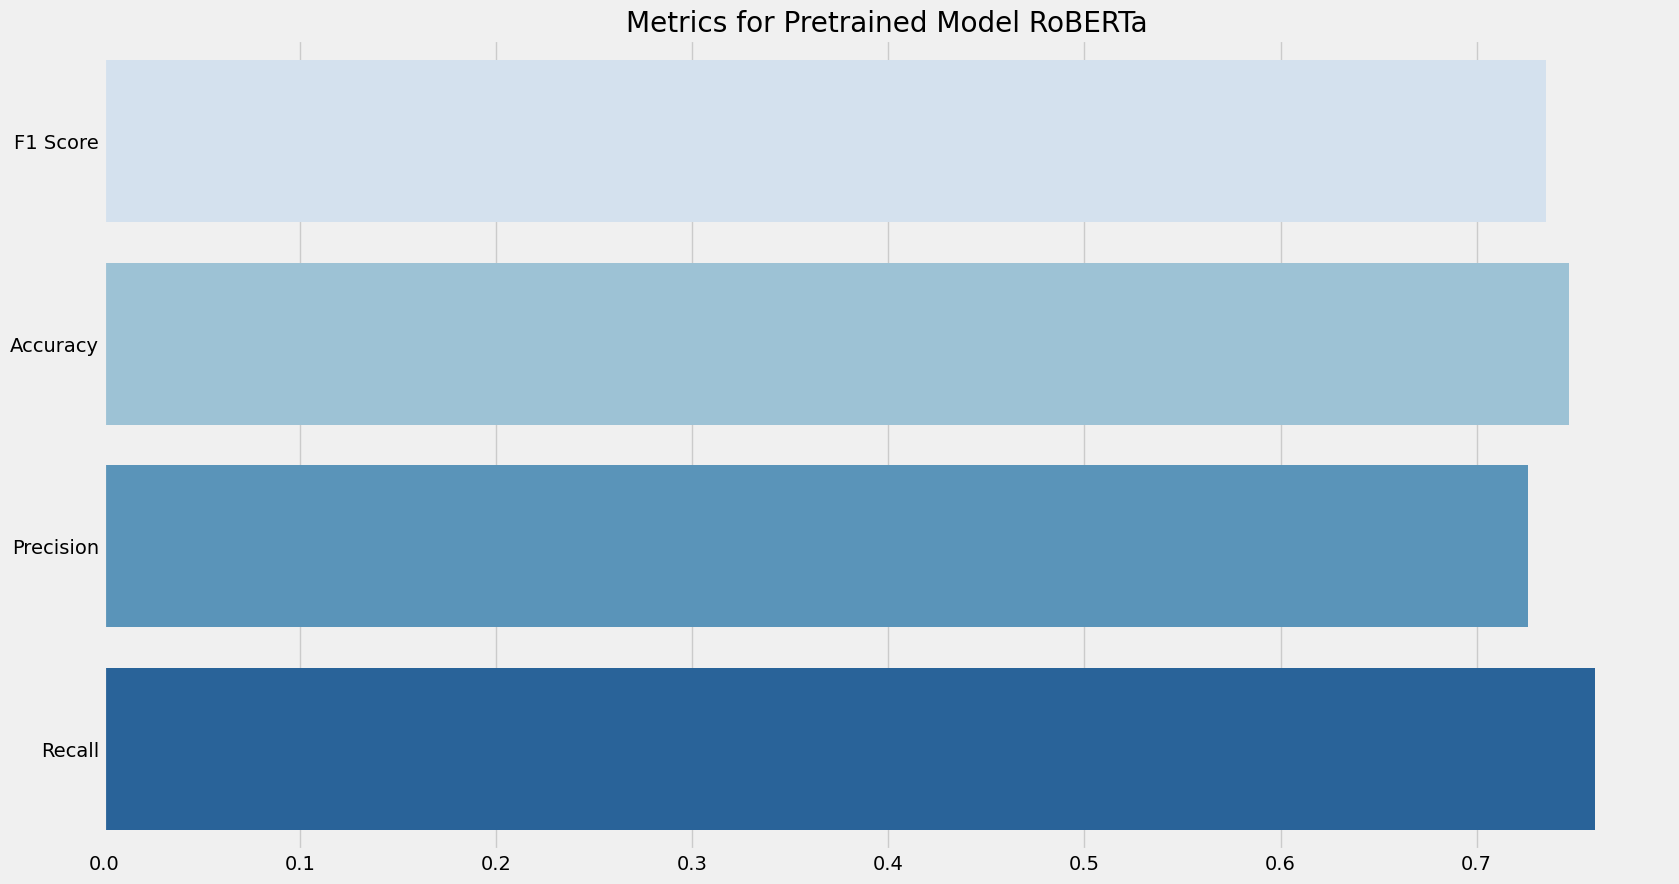

In [ ]:
f1_roberta = f1_score(y.tolist(), y_pred_roberta, average="macro")
#print(f"F1 Score:           {f1_burt:.4f}")
acc_roberta = accuracy_score(y.tolist(), y_pred_roberta)
#print(f"Accuracy:           {acc_burt:.4f}")
precision_score_roberta = precision_score(y.tolist(), y_pred_roberta, average="macro")
#print(f"Precision:          {precision_score_burt:.4f}")
recall_score_roberta = recall_score(y.tolist(), y_pred_roberta, average="macro")
#print(f"Recall:             {recall_score_burt:.4f}")
dict_roburta = {
    "F1 Score": f1_roberta,
    "Accuracy": acc_roberta,
    "Precision": precision_score_roberta,
    "Recall": recall_score_roberta
}

sns.barplot(y=list(dict_roburta.keys()), x=list(dict_roburta.values()), hue=list(dict_roburta.keys()), palette="BlueU/H&FT%s")
plt.title("Metrics for Pretrained Model RoBERTa")